In [2]:
# This is a Python 3 environment

# Base level imports for data science work

import numpy as np 
import pandas as pd
import re,string,unicodedata
import os
from os import path

# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Libs
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Additional Libs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

# Deep Learning Libs
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [37]:
# Import our data

true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake_Fake.csv")

In [38]:
# Let's explore the data at a base level

true.sample(10)

,title,text,subject,date
18413,Vatican vows to seek truth about diplomat in c...,"ROME (Reuters) - The Vatican, at the start of ...",worldnews,"October 3, 2017"
6388,Trump recommits to 'major border tax' on forei...,NEW YORK (Reuters) - President-elect Donald Tr...,politicsNews,"January 11, 2017"
19363,Zambia fears humanitarian crisis as influx of ...,LUSAKA (Reuters) - Zambia fears a looming huma...,worldnews,"September 22, 2017"
3059,"Trump denies obstructing FBI probe, says has n...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 22, 2017"
6262,Trump jokes Tillerson finding U.S. Senate conf...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"January 18, 2017"
21373,EU citizens leaving UK pushes down net migrati...,LONDON (Reuters) - Net migration to Britain fe...,worldnews,"August 24, 2017"
13924,Rights groups say outside monitors needed for ...,YANGON (Reuters) - Human rights groups called ...,worldnews,"November 24, 2017"
7349,"Trump says discussed immigration, healthcare a...",WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"November 10, 2016"
1361,Blackwater founder Prince weighing U.S. Senate...,"WASHINGTON (Reuters) - Erik Prince, who founde...",politicsNews,"October 8, 2017"
10006,California to expand paid family leave for new...,"SACRAMENTO, Calif. (Reuters) - California will...",politicsNews,"April 9, 2016"


In [39]:
fake.sample(10)

,title,text,subject,date
22339,Patrick Henningsen LIVE with guest Ray McGover...,Join Patrick every week at 21WIRE.TV for news...,US_News,"December 1, 2016"
16064,HYSTERICAL! President Trump Calls Out Obama: “...,President Trump has the line of the day: The ...,Government News,"Jun 5, 2017"
19497,JOE BIDEN’S SHOCKING ANNOUNCEMENT: “What the h...,"VP Joe Biden: Yeah, I m going to run in 2020....",left-news,"Dec 6, 2016"
19747,OBAMA DANCES At Last-Ever White House Gig To D...,,left-news,"Oct 23, 2016"
6238,Drinks And Dancing As Things Got VERY Real Du...,No matter which candidate you re pulling for t...,News,"May 22, 2016"
1105,Trump Fan Debates 12-Year-Old And HUMILIATES ...,One of Donald Trump s favorite morons you kn...,News,"June 17, 2017"
2260,Ben Carson Just Called Slaves ‘Immigrants’ As...,Trump s newly confirmed Secretary of Housing a...,News,"March 6, 2017"
18065,First Grader “Investigated” in Principal’s Off...,Can you believe a first grader was investigat...,left-news,"Aug 25, 2017"
445,Trump STUPIDLY Attacks A Major U.S. Ally Befo...,If Donald Trump drags us into war with North K...,News,"September 3, 2017"
10054,FORMER SECRET SERVICE AGENT EXPLAINS TRUMP: “H...,Former Secret Service agent Dan Bongino has an...,politics,"Aug 25, 2017"


In [40]:
#dimension
true.shape,fake.shape

((21417, 4), (23481, 4))

In [41]:
# These dataframes do not currently have a category for whether they are true or fake.
# Let's create those before we combine the datasets

true['category'] = 1
fake['category'] = 0

# Now we'll merge the two datasets into a single dataframe

df = pd.concat([true,fake])

In [42]:
df.sample(10)

,title,text,subject,date,category
16314,"After Iran shock, nervous Europe girds for nex...",BERLIN (Reuters) - Following Donald Trump s de...,worldnews,"October 27, 2017",1
21067,Brazilian police target gangs shipping cocaine...,RIO DE JANEIRO (Reuters) - Brazilian authoriti...,worldnews,"September 4, 2017",1
3103,Exclusive: U.S. investigators in Russia probe ...,NEW YORK (Reuters) - Federal investigators pro...,politicsNews,"June 20, 2017",1
5848,WHOA: Clinton Just Effectively Sh*tcanned Deb...,If you re dissatisfied with Debbie Wasserman-S...,News,"June 16, 2016",0
2059,This Die Hard Trump Supporter Has Now Gone Fu...,Kraig Moss was a die hard Donald Trump support...,News,"March 22, 2017",0
13580,Courtroom where war crimes defendant drank 'po...,THE HAGUE (Reuters) - Dutch police have declar...,worldnews,"November 29, 2017",1
9949,U.S. Congress panel postpones work on Puerto R...,WASHINGTON (Reuters) - Legislation to help Pue...,politicsNews,"April 13, 2016",1
11026,BARRACUDA! FORMER OBAMA ADVISOR Rants Against ...,FORMER WHITE HOUSE ADVISOR STEPHANIE CUTTER to...,politics,"Apr 28, 2017",0
17756,WHY WAS Mandalay Bay Security Guard Caught By ...,Mandalay Bay security guard Jesus Campos myste...,left-news,"Oct 26, 2017",0
8806,Clinton's conundrum: caught between protesters...,WASHINGTON (Reuters) - The shocking shooting d...,politicsNews,"July 11, 2016",1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


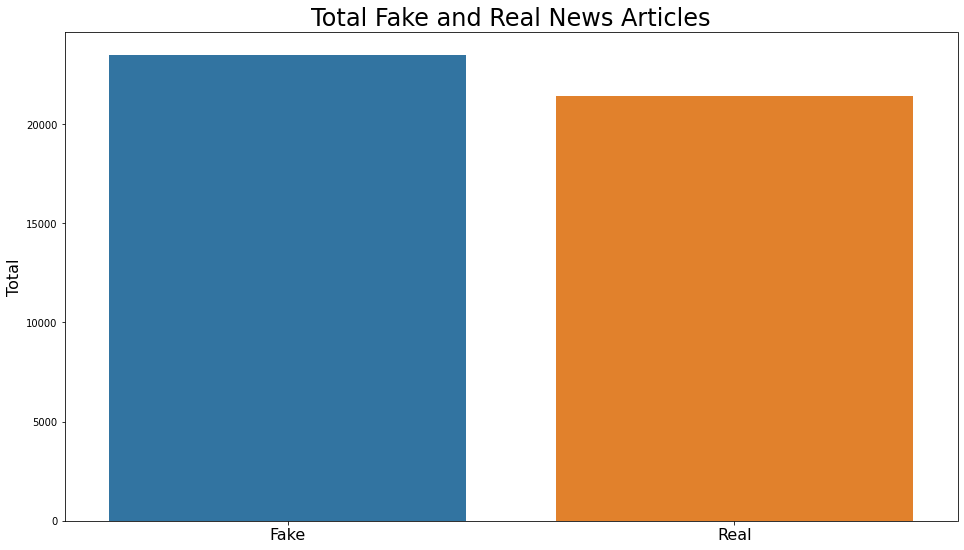

In [43]:
# figure to show them in comparative word

plt.figure(figsize=(16,9))

sns.countplot(df.category)
plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([0, 1], ['Fake', 'Real'], fontsize=16)

plt.show()

In [44]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [45]:
df = df.dropna() # to drop null values

In [46]:
#to get info what our database is
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [47]:
# From all of the above exploration we can see we have a fairly balanced dataset. There are also no null values
# We have a total of 44,898 observations to work with moving forward.
# One last thing I'm interested in looking at at this point
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

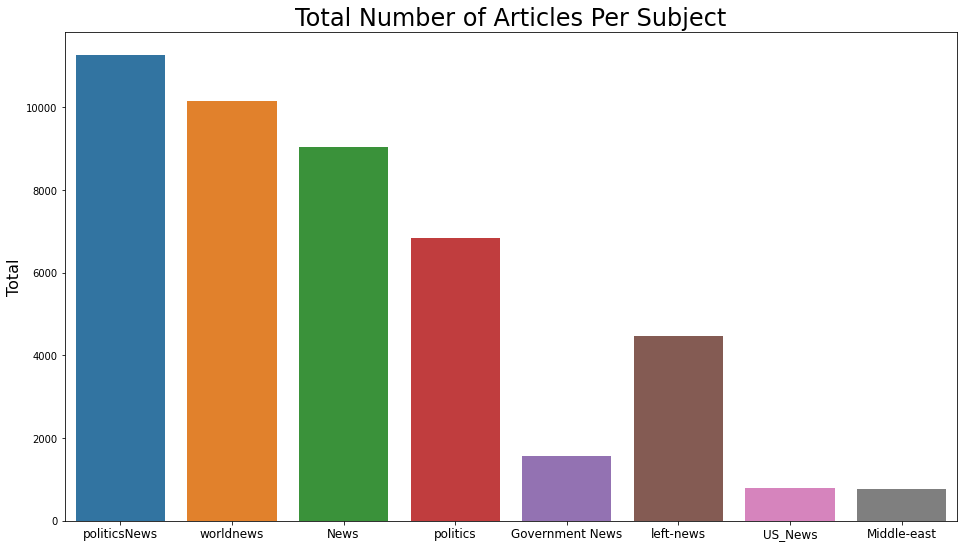

In [48]:
#to figure what is difference
plt.figure(figsize=(16,9))
sns.countplot(x='subject', data=df)

plt.title('Total Number of Articles Per Subject', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)

plt.show()

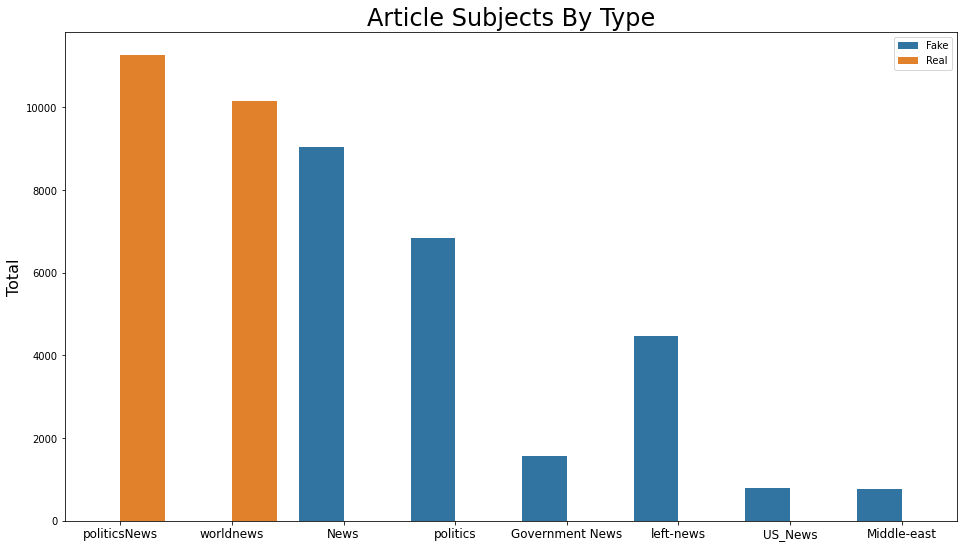

In [49]:
#divide between the fake vs the real
plt.figure(figsize=(16,9))
sns.countplot(x='subject', hue='category', data=df)

plt.title('Article Subjects By Type', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.legend(['Fake', 'Real'])

plt.show()

In [50]:
# Well, now that is interesting. It's clear that if we include the 'Subject' column in our further explorationand analysis it will have a significant impact on our results. So, we'll need to drop that column.

In [51]:
# Now we'll create the Corpus that will be used in our NLP model
# This will create a single column with all the relevant text

df['text'] = df['title'] + " " + df['text']

In [28]:
# This will delete all the other columns we do not need for the rest of the work.
del df['title'] # added to our text corpus
del df['subject'] # we determined it would affect our results
del df['date'] # this might be an interesting item to keep in a future analysis that spans more time, but we will delete it for now.

In [52]:
# Now we need to clean up the corpus. We'll do this by removing stop words, URLs, brackets, etc
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [58]:
#to parsing and crawl the data
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Final function to clean the text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column
df['text']=df['text'].apply(clean_text)

In [60]:
df.sample(10)

,title,text,subject,date,category
23290,Boiler Room EP #68 – 4 Non-Binary Blondes & So...,Boiler Room EP #68 – 4 Non-Binary Blondes Soci...,Middle-east,"August 11, 2016",0
8610,Trump draws ire after urging Russia to find 'm...,Trump draws ire urging Russia find 'missing' C...,politicsNews,"July 27, 2016",1
9570,JUST IN: DALLAS COWBOYS OWNER Jerry Jones Is L...,IN: DALLAS COWBOYS OWNER Jerry Jones Leading E...,politics,"Oct 29, 2017",0
3091,Conservative White Grievance Queen Has Pathet...,Conservative White Grievance Queen Pathetic Tw...,News,"January 9, 2017",0
18032,CNN Host Spoke At Violent Antifa Rally Calling...,CNN Host Spoke Violent Antifa Rally Calling Tr...,left-news,"Sep 1, 2017",0
12715,COMEDY GOLD! NANCY PELOSI Talks Clinton And Tr...,COMEDY GOLD! NANCY PELOSI Talks Clinton Trump ...,politics,"Oct 16, 2016",0
21102,SUPREME COURT AGREES TO TAKE ON Obama’s Un-Ame...,SUPREME COURT AGREES TAKE Obama’s Un-American ...,left-news,"Jan 19, 2016",0
20280,"Russian defense minister, Syria's Assad meet i...","Russian defense minister, Syria's Assad meet D...",worldnews,"September 12, 2017",1
21356,"Trump calls Egypt's Sisi, says keen to overcom...","Trump calls Egypt's Sisi, says keen overcome o...",worldnews,"August 25, 2017",1
14366,ADMIRAL “ACE” LYONS: “Why would an American Pr...,ADMIRAL “ACE” LYONS: “Why would American Presi...,politics,"Mar 5, 2016",0


<function matplotlib.pyplot.show(close=None, block=None)>

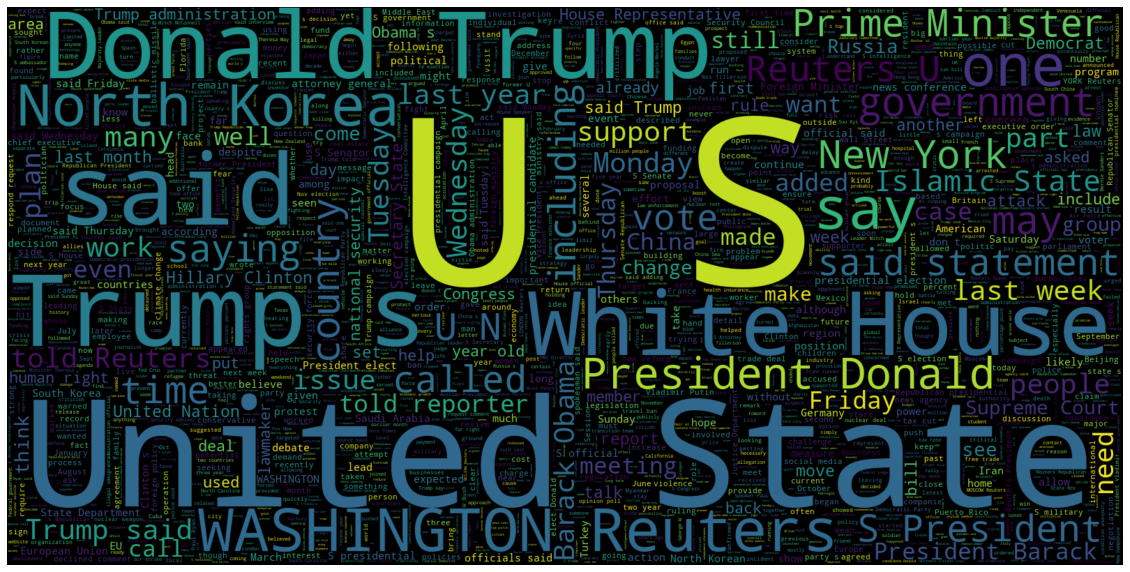

In [62]:
#using wordcloud to identify the most common word

# Text from the real news articles
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

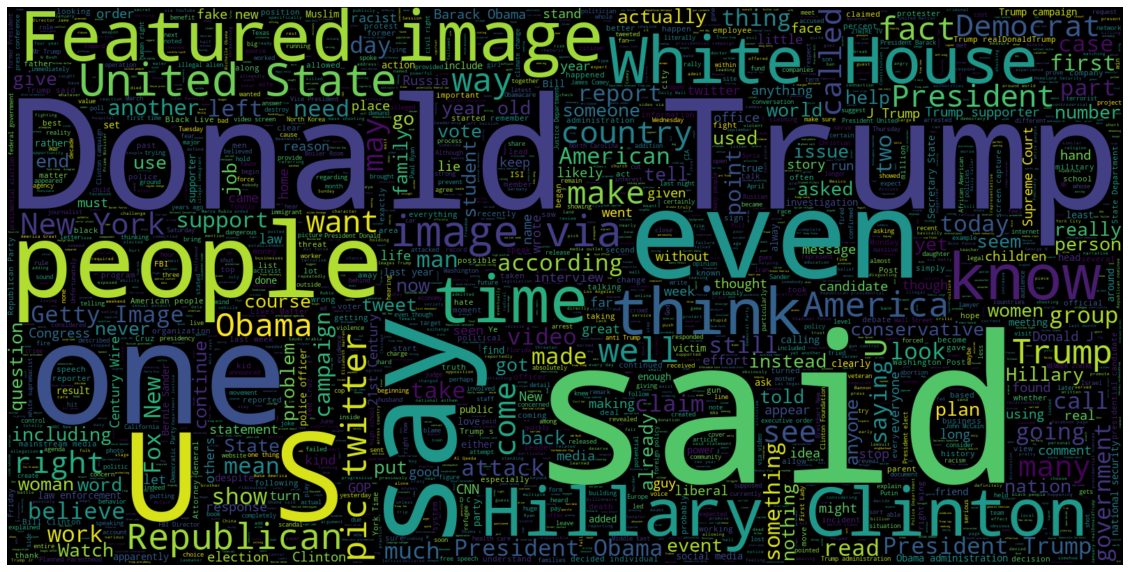

In [63]:
# Text from the fake news articles
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

plt.axis("off")
plt.show

In [66]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/merdyst/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [67]:

plt.figure(figsize = (20,20))
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

corpus = clean(' '.join(df[df.category == 1].text))

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

corpus_str = listToString(corpus)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask / color image taken from
coloring = np.array(Image.open(path.join(d, "real_news.jpg")))
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words = 2000 , width = 1600 , height = 800, mask=coloring,
               stopwords=stopwords, max_font_size=80, random_state=42)

# generate word cloud
wc.generate(corpus_str)

# create coloring from image
image_colors = ImageColorGenerator(coloring)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# # This bit of code is used to create a high quality exported image
# fig1 = plt.gcf()
# plt.show()
# plt.draw()
# fig1.savefig("real_news_nlp_word_cloud.png", bbox_inches='tight', dpi=600)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/merdyst/Jupyter/Fake News/real_news.jpg'

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,20))
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

corpus = clean(' '.join(df[df.category == 0].text))

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

corpus_str = listToString(corpus)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask / color image taken from
coloring = np.array(Image.open(path.join(d, "fake_news.jpg")))
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, mask=coloring,
               stopwords=stopwords, max_font_size=80, random_state=42)

# generate word cloud
wc.generate(corpus_str)

# create coloring from image
image_colors = ImageColorGenerator(coloring)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# # This bit of code is used to create a high quality exported image
# fig1 = plt.gcf()
# plt.show()
# plt.draw()
# fig1.savefig("fake_news_nlp_word_cloud.png", bbox_inches='tight', dpi=600)

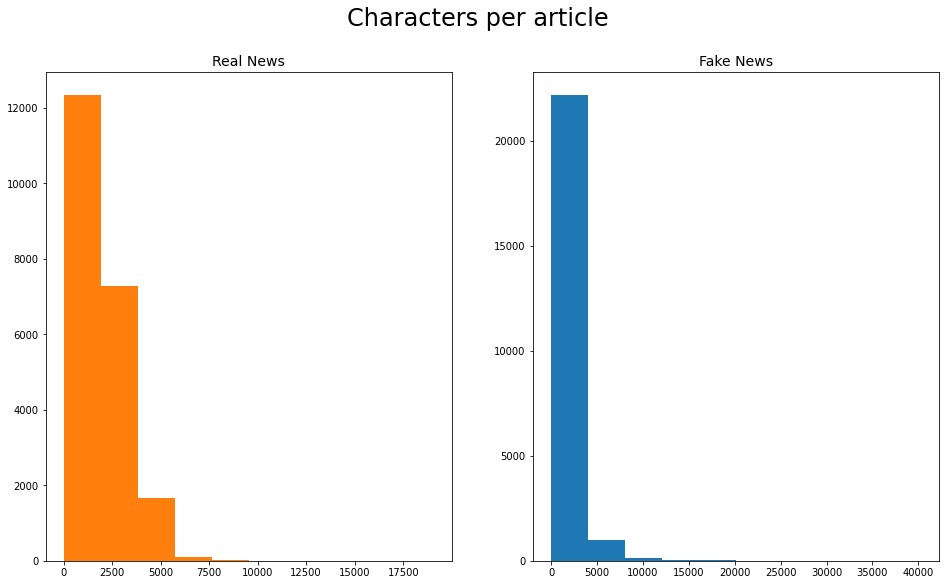

In [68]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len=df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color='tab:orange')
ax1.set_title('Real News', fontsize=14)
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color='tab:blue')
ax2.set_title('Fake News', fontsize=14)
fig.suptitle('Characters per article', fontsize=24)

plt.show()

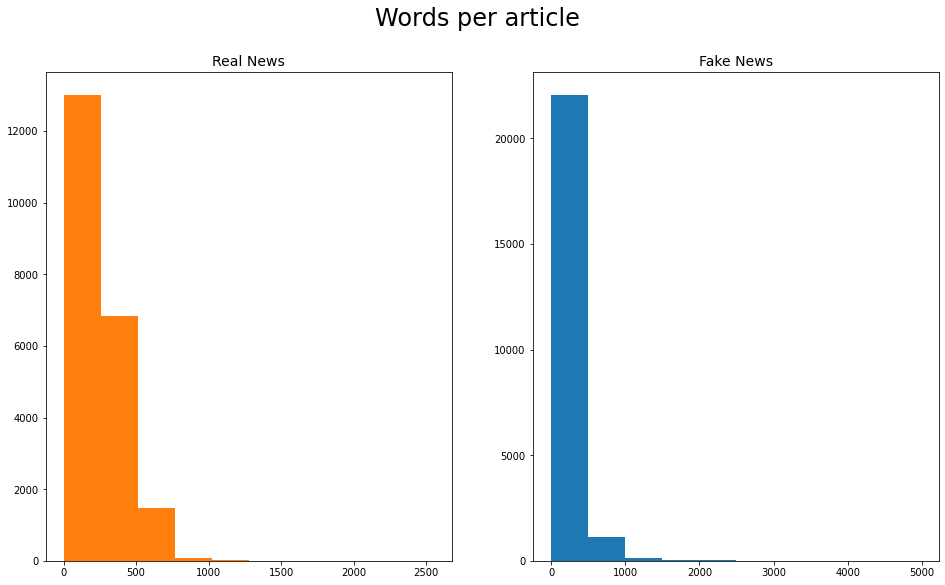

In [69]:
# There seem to be differences in the characters per article between the two categories. It looks like 
# 2500 or less characters in text is the most common in real news category, while around 5000 or less
# characters in text are most common in fake news category.

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len=df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='tab:orange')
ax1.set_title('Real News', fontsize=14)
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='tab:blue')
ax2.set_title('Fake News', fontsize=14)
fig.suptitle('Words per article', fontsize=24)

# plt.title('Article Subjects By Type')
# plt.ylabel('Total', fontsize=16)
# plt.xlabel('')
# plt.xlim(fontsize=12)
# plt.legend(['Fake', 'Real'])
plt.show()

In [70]:
#Train Test Split Data
# First, We need to train split data

X = df.text
y = df.category

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)

In [71]:
X = df.text
y = df.category

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)

# Create of Count Vectorize object
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transform the train dataset
cv_train=cv.fit_transform(X_train)

# Transform the test dataset
cv_test=cv.transform(X_test)

print('Bag of words Train:',cv_train.shape)
print('Bag of words Test:',cv_test.shape)

Bag of words Train: (35918, 7349117)
Bag of words Test: (8980, 7349117)


In [72]:
# Create the TF-IDF object
tfidf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

# Transform the train dataset
tfidf_train=tfidf.fit_transform(X_train)

# Transform the test dataset
tfidf_test=tfidf.transform(X_test)

print('TF-IDF Train:',tfidf_train.shape)
print('TF-IDF Test:',tfidf_test.shape)

TF-IDF Train: (35918, 7349117)
TF-IDF Test: (8980, 7349117)


In [73]:
# Create our model object
mnb = MultinomialNB()

# Fit the model to the Bag of words CountVectorizor
mnb_cv = mnb.fit(cv_train, y_train)

# Fit the model to the TF-IDF features
mnb_tfidf = mnb.fit(tfidf_train, y_train)

In [74]:
# Predicting the model for bag of words
mnb_cv_predict=mnb.predict(cv_test)

# Predicting the model for tf-idf features
mnb_tfidf_predict=mnb.predict(tfidf_test)

In [75]:
# Check the accuracy score for bag of words
mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
print("Naive Bayes Bag of words accuracy score:", mnb_cv_score)

# Check the accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("Naive Bayes TF-IDF accuracy score:", mnb_tfidf_score)

Naive Bayes Bag of words accuracy score: 0.9417594654788418
Naive Bayes TF-IDF accuracy score: 0.9169265033407572


In [77]:
mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
print(mnb_cv_report)
mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4696
           1       0.94      0.93      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      4696
           1       0.98      0.84      0.91      4284

    accuracy                           0.92      8980
   macro avg       0.93      0.91      0.92      8980
weighted avg       0.92      0.92      0.92      8980



In [78]:
# At the end of some quick EDA and NLP modeling, we're left with a high level understanding of the two datasets,
# some charts and word clouds for a data product, and a model that currently has 94% accuracy with Bag of Words
# and 92% with TF-IDF.